In [27]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('xAPI-Edu-Data.csv')
print(dataset.shape)

(480, 17)


In [15]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [16]:
fuzzy_features = dataset.drop(['StageID', 'gender', 'NationalITy', 'Semester', 'PlaceofBirth', 'GradeID', 'Topic', 'SectionID', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'], axis=1)
fuzzy_features.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [17]:
#Convert Pandas dataframe to numpy array
data = fuzzy_features.values
print(data.shape)
print(type(data))
print(data[453])

(480, 4)
<type 'numpy.ndarray'>
[29 78 40 12]


In [18]:
#Check unique values of all fuzzy variables

val0, count0 = np.unique(data[:,0], return_counts = True)
val1, count1 = np.unique(data[:,1], return_counts = True)
val2, count2 = np.unique(data[:,2], return_counts = True)
val3, count3 = np.unique(data[:,3], return_counts = True)

In [21]:
print(val0)
print(count0)
print(val1)
print(count1)
print(val2)
print(val3)
#Result: All variables have values between 0 to 100

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  32  33  35  36  39  40
  41  42  45  49  50  51  52  53  55  57  59  60  61  62  65  66  67  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  92  95  96  97  98  99 100]
[ 9  2  8  2  3 10  1  7  5  3 31  6 12  4  3 14  2  5  2 11 11  3  6  3
  3 11  6  1  4  9  6  1  9  1  5  6  1  4  4  3 17  3  1  2  7  1  2 12
  1  6  4  1  1  6 31  3 17  1  3  8  1  4  6  6 28  5  4  1  2  9  1  8
  3  5 11  4  5  2  1  3  1  6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 33 34 35 36 38 39 40 41 42 43 44 48 50 51 52 54 55
 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 7  1 10  5  5  7  6  9  6  7 12  2 13  4  5  9  1  6  1  2 10  6  5  1
  4  2  2  1  2  6  3  2  3  4  1  1  2  4  3  3  1  3  1  8  7  5  1 

In [30]:
a = np.arange(0, 101, 1)
rh_lo = fuzz.trapmf(a, [0, 0, 10, 30])
rh_avg = fuzz.trimf(a, [25, 50, 75])
rh_hi = fuzz.trapmf(a, [70, 90, 100, 100])



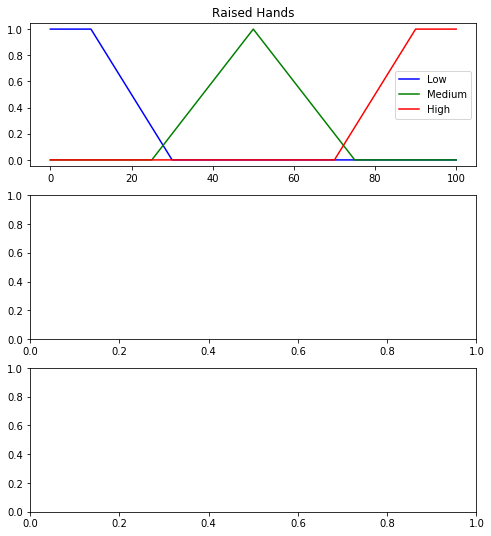

In [32]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(a, rh_lo, 'b', linewidth=1.5, label = 'Low')
ax0.plot(a, rh_avg, 'g', linewidth=1.5, label = 'Medium')
ax0.plot(a, rh_hi, 'r', linewidth=1.5, label = 'High')
ax0.set_title('Raised Hands')
ax0.legend()